# 11장 실용적인 딥러닝을 위해

In [1]:
# 필요 라이브러리 선언
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# PDF 출력
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

### 11.1 프레임워크의 활용

In [3]:
# 데이터 준비

# 변수 정의

# D: 입력 노드 개수
D = 784

# H: 은닉층의 노드 개수
H = 128

# 분류 클래스의 개수
num_classes = 10

# Keras 함수로 데이터 읽기
from keras.datasets import mnist
(x_train_org, y_train), (x_test_org, y_test) \
 = mnist.load_data()

# 입력 데이터의 가공(1차원)
x_train = x_train_org.reshape(-1, D) / 255.0
x_test = x_test_org.reshape((-1, D)) / 255.0

# 정답 데이터의 가공(원핫 인코딩)
from keras.utils import np_utils
y_train_ohe =\
 np_utils.to_categorical(y_train, num_classes)
y_test_ohe =\
 np_utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
# 모델의 정의

# 필요 라이브러리 로딩
from keras.models import Sequential
from keras.layers import Dense

# Sequential 모델의 정의
model = Sequential()

# 은닉층1의 정의
model.add(Dense(H, activation='relu', input_shape=(D,)))

# 은닉층2의 정의
model.add(Dense(H, activation='relu'))

# 출력층
model.add(Dense(num_classes, activation='softmax'))

# 모델의 컴파일
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'sgd',
              metrics=['accuracy'])

In [5]:
# 학습 과정

# 학습의 단위
batch_size = 512

# 반복 횟수
nb_epoch = 50

# 모델의 학습
history1 = model.fit(
    x_train, 
    y_train_ohe,
    batch_size = batch_size, 
    epochs = nb_epoch,
    verbose = 1, 
    validation_data = (x_test, y_test_ohe))

Epoch 1/50
118/118 [==============================] - 2s 13ms/step - loss: 2.1747 - accuracy: 0.2620 - val_loss: 1.6952 - val_accuracy: 0.6744
Epoch 2/50
118/118 [==============================] - 1s 9ms/step - loss: 1.5427 - accuracy: 0.7029 - val_loss: 1.0658 - val_accuracy: 0.7839
Epoch 3/50
118/118 [==============================] - 1s 9ms/step - loss: 0.9906 - accuracy: 0.7942 - val_loss: 0.7487 - val_accuracy: 0.8333
Epoch 4/50
118/118 [==============================] - 1s 9ms/step - loss: 0.7311 - accuracy: 0.8278 - val_loss: 0.6012 - val_accuracy: 0.8523
Epoch 5/50
118/118 [==============================] - 1s 9ms/step - loss: 0.5997 - accuracy: 0.8488 - val_loss: 0.5231 - val_accuracy: 0.8665
Epoch 6/50
118/118 [==============================] - 1s 9ms/step - loss: 0.5244 - accuracy: 0.8652 - val_loss: 0.4701 - val_accuracy: 0.8788
Epoch 7/50
118/118 [==============================] - 1s 9ms/step - loss: 0.4797 - accuracy: 0.8714 - val_loss: 0.4349 - val_accuracy: 0.8862
Epoch

## 11.4 수치미분

In [6]:
import numpy as np

# 네이피어 상수를 밑으로 하는 로그함수의 정의
def f(x):
    return np.exp(x)

# 아주 작은 수 h의 정의
h = 0.001

# f'(0)의 근사계산
# f'(0) = f(0) = 1에 가까워짐
diff = (f(0 + h) - f(0 - h))/(2 * h)

# 결과 확인
print(diff)

1.0000001666666813


## 11.5 고도의 학습법

### SGD

In [7]:
# 필요 라이브러리 로딩
from keras.models import Sequential
from keras.layers import Dense

# 학습의 단위
batch_size = 512

# 반복 횟수
nb_epoch = 50

In [8]:
# Sequential 모델의 정의
model = Sequential()

# 은닉층1의 정의
model.add(Dense(H, activation='relu', kernel_initializer='he_normal', input_shape=(D,)))

# 은닉층2의 정의
model.add(Dense(H, activation='relu', kernel_initializer='he_normal'))

# 출력층
model.add(Dense(num_classes, activation='softmax', kernel_initializer='he_normal'))

In [9]:
# 모델의 컴파일
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'sgd',
              metrics=['accuracy'])

# 모델의 학습
history1 = model.fit(
    x_train, 
    y_train_ohe,
    batch_size = batch_size, 
    epochs = nb_epoch,
    verbose = 1, 
    validation_data = (x_test, y_test_ohe))

Epoch 1/50
118/118 [==============================] - 2s 10ms/step - loss: 2.0936 - accuracy: 0.3248 - val_loss: 1.4474 - val_accuracy: 0.6950
Epoch 2/50
118/118 [==============================] - 1s 9ms/step - loss: 1.2901 - accuracy: 0.7233 - val_loss: 0.8639 - val_accuracy: 0.8026
Epoch 3/50
118/118 [==============================] - 1s 9ms/step - loss: 0.8213 - accuracy: 0.8078 - val_loss: 0.6370 - val_accuracy: 0.8410
Epoch 4/50
118/118 [==============================] - 1s 9ms/step - loss: 0.6383 - accuracy: 0.8370 - val_loss: 0.5300 - val_accuracy: 0.8653
Epoch 5/50
118/118 [==============================] - 1s 9ms/step - loss: 0.5346 - accuracy: 0.8605 - val_loss: 0.4669 - val_accuracy: 0.8756
Epoch 6/50
118/118 [==============================] - 1s 9ms/step - loss: 0.4774 - accuracy: 0.8736 - val_loss: 0.4240 - val_accuracy: 0.8863
Epoch 7/50
118/118 [==============================] - 1s 10ms/step - loss: 0.4389 - accuracy: 0.8824 - val_loss: 0.3951 - val_accuracy: 0.8930
Epoc

### RmsProp

In [10]:
# Sequential 모델의 정의
model = Sequential()

# 은닉층1의 정의
model.add(Dense(H, activation='relu', kernel_initializer='he_normal', input_shape=(D,)))

# 은닉층2의 정의
model.add(Dense(H, activation='relu', kernel_initializer='he_normal'))

# 출력층
model.add(Dense(num_classes, activation='softmax', kernel_initializer='he_normal'))

In [11]:
# 모델의 컴파일
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics=['accuracy'])

# 모델의 학습
history2 = model.fit(
    x_train, 
    y_train_ohe,
    batch_size = batch_size, 
    epochs = nb_epoch,
    verbose = 1, 
    validation_data = (x_test, y_test_ohe))

Epoch 1/50
118/118 [==============================] - 2s 13ms/step - loss: 0.7809 - accuracy: 0.7761 - val_loss: 0.2756 - val_accuracy: 0.9128
Epoch 2/50
118/118 [==============================] - 1s 10ms/step - loss: 0.2152 - accuracy: 0.9355 - val_loss: 0.1786 - val_accuracy: 0.9467
Epoch 3/50
118/118 [==============================] - 1s 10ms/step - loss: 0.1464 - accuracy: 0.9568 - val_loss: 0.1467 - val_accuracy: 0.9531
Epoch 4/50
118/118 [==============================] - 1s 10ms/step - loss: 0.1080 - accuracy: 0.9678 - val_loss: 0.1497 - val_accuracy: 0.9526
Epoch 5/50
118/118 [==============================] - 1s 10ms/step - loss: 0.0900 - accuracy: 0.9734 - val_loss: 0.1044 - val_accuracy: 0.9671
Epoch 6/50
118/118 [==============================] - 1s 10ms/step - loss: 0.0703 - accuracy: 0.9792 - val_loss: 0.0998 - val_accuracy: 0.9704
Epoch 7/50
118/118 [==============================] - 1s 10ms/step - loss: 0.0600 - accuracy: 0.9818 - val_loss: 0.0949 - val_accuracy: 0.9706

### Momentum

In [12]:
# Sequential 모델의 정의
model = Sequential()

# 은닉층1의 정의
model.add(Dense(H, activation='relu', kernel_initializer='he_normal', input_shape=(D,)))

# 은닉층2의 정의
model.add(Dense(H, activation='relu', kernel_initializer='he_normal'))

# 출력층
model.add(Dense(num_classes, activation='softmax', kernel_initializer='he_normal'))

In [13]:
# 모델의 컴파일
from keras import optimizers
sgd = optimizers.SGD(momentum = 0.9)
model.compile(loss = 'categorical_crossentropy',
              optimizer = sgd,
              metrics=['accuracy'])

# 모델의 학습
history3 = model.fit(
    x_train, 
    y_train_ohe,
    batch_size = batch_size, 
    epochs = nb_epoch,
    verbose = 1, 
    validation_data = (x_test, y_test_ohe))

Epoch 1/50
118/118 [==============================] - 2s 11ms/step - loss: 1.4465 - accuracy: 0.5515 - val_loss: 0.3596 - val_accuracy: 0.8971
Epoch 2/50
118/118 [==============================] - 1s 9ms/step - loss: 0.3555 - accuracy: 0.8998 - val_loss: 0.2777 - val_accuracy: 0.9179
Epoch 3/50
118/118 [==============================] - 1s 9ms/step - loss: 0.2821 - accuracy: 0.9184 - val_loss: 0.2438 - val_accuracy: 0.9279
Epoch 4/50
118/118 [==============================] - 1s 9ms/step - loss: 0.2427 - accuracy: 0.9302 - val_loss: 0.2181 - val_accuracy: 0.9348
Epoch 5/50
118/118 [==============================] - 1s 9ms/step - loss: 0.2184 - accuracy: 0.9363 - val_loss: 0.1995 - val_accuracy: 0.9404
Epoch 6/50
118/118 [==============================] - 1s 9ms/step - loss: 0.2002 - accuracy: 0.9427 - val_loss: 0.1870 - val_accuracy: 0.9440
Epoch 7/50
118/118 [==============================] - 1s 9ms/step - loss: 0.1806 - accuracy: 0.9481 - val_loss: 0.1701 - val_accuracy: 0.9489
Epoch

### 그래프 표시 및 비교

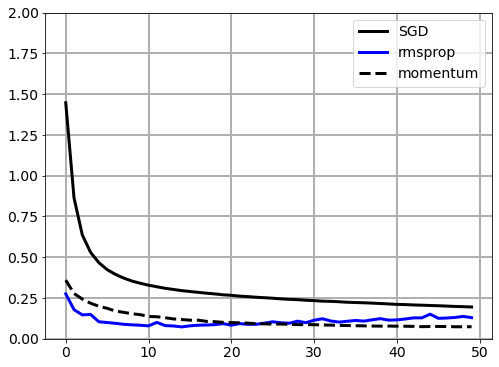

In [14]:
#import matplotlib.pyplot as plt

# 학습 곡선 표시(손실함수의 값)
plt.figure(figsize=(8,6))
plt.plot(history1.history['val_loss'],label='SGD', lw=3, c='k')
plt.plot(history2.history['val_loss'],label='rmsprop', lw=3, c='b')
plt.plot(history3.history['val_loss'],label='momentum', lw=3, c='k', linestyle='dashed')
plt.ylim(0,2)
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(lw=2)
plt.legend(fontsize=14)
plt.show()

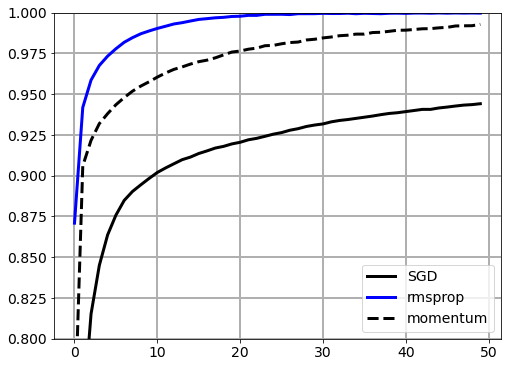

In [15]:
import matplotlib.pyplot as plt

# 학습 곡선 표시(정확도)
plt.figure(figsize=(8,6))
plt.plot(history1.history['accuracy'],label='SGD', lw=3, c='k')
plt.plot(history2.history['accuracy'],label='rmsprop', lw=3, c='b')
plt.plot(history3.history['accuracy'],label='momentum', lw=3, c='k', linestyle='dashed')
plt.ylim(0.8,1)
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(lw=2)
plt.legend(fontsize=14)
plt.show()

## 11.6 과학습 대책

In [16]:
# 정답 데이터의 데이터 수
div = 8

# 근사다항식의 차원
dim = 8

# y = -x*4 + x**3 -3x**2 + 8x -7
p = [-1, 1, -3, 8, -7]

# x의 정의역[-2, 1]
xMin = -2
xMax = 1

$ f(x) = -x^4 + x^3 -3x^2 + 8x -7 + N(0,5) $

In [17]:
# x: xMin과 xMan의 사이를 div개로 분할한 벡터
x = np.linspace(xMin, xMax, num=div)

# xx: x를 10배 더 세밀한 간격으로 분할한 벡터
xx = np.linspace(xMin, xMax, num=div*10)

# y, yy: x, xx 각각의 벡터에 대해 다항식의 값을 계산한 벡터
y = np.polyval(p, x)
yy = np.polyval(p, xx)

# z: y에 정규분포의 노이즈를 추가하고 이것을 정답 데이터고 한다.
z = y + 5 * np.random.randn(div)

In [18]:
# 벡터 표시용 함수
def print_fix(x):
    [print('{:.3f}'.format(n)) for n in x]
    
# 모델을 인용하여 다항식의 계산을 표시
def print_fix_model(m):
    w = m.coef_.tolist()
    w[0] = m.intercept_
    print_fix(w)    

In [19]:
# 다항식 행렬을 만들어 모델의 입력 변수로 한다.

# x**n의 벡터 계산용 함수
def f(x) :
    return [x**i for i in range(dim)]

# x: x벡터에서 다항식 2차원 배열을 만든 것
X = [f(x0) for x0 in x]

# Xx: xx벡터에서 다항식 2차원 배열을 만든 것
XX = [f(x0) for x0 in xx]

In [20]:
# 선형 모델 라이브러리의 로딩
from sklearn.linear_model import LinearRegression

# 모델의 초기화 및 학습
model = LinearRegression().fit(X, z)

# 예측값의 취득
yy_pred = model.predict(XX)

In [21]:
# Ridge 모델 라이브러리의 로딩
from sklearn.linear_model import Ridge

# 모델의 생성 및 학습
#model2 = Ridge(alpha=5).fit(X, z)
model2 = Ridge(alpha=0.5).fit(X, z)

In [22]:
# 예측값의 취득
yy_pred2 = model2.predict(XX)

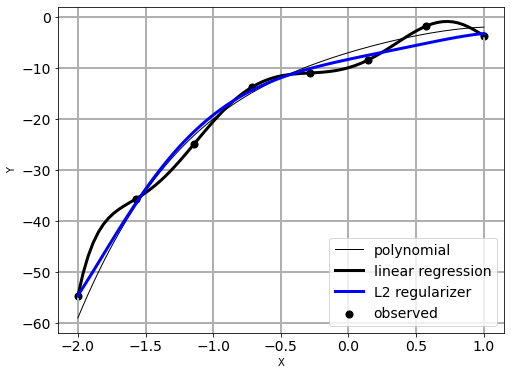

In [23]:
# 그래프 표시
plt.figure(figsize=(8,6))
plt.plot(xx, yy, label='polynomial', lw=1, c='k')
plt.scatter(x, z, label='observed', s=50, c='k')
plt.plot(xx, yy_pred, label='linear regression', lw=3, c='k')
plt.plot(xx, yy_pred2, label='L2 regularizer', lw=3, c='b')
plt.xlabel('X')
plt.ylabel('Y')
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(lw=2)
plt.legend(fontsize=14)
plt.show()